In [8]:
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import csv
import tensorflow as tf
from tensorflow import keras

# Define function that calculate accuracy, precision and recall
def calculate(tp,fn,tn,fp,result):
    for i in range(len(Y_test)):
        if Y_test[i] == 1:
            if Y_test[i] == result[i]:
                tp += 1
            else:
                fn += 1
        if Y_test[i] == 0:
            if Y_test[i] == result[i]:
                tn += 1
            else:
                fp += 1
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print("accuracy:",accuracy)
    print("precision:",precision)
    print("recall:",recall)
 

In [9]:
# Define function that plots the ROC curve
def plot(Y_test,pred):
    fpr, tpr, threshold = metrics.roc_curve(Y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [10]:
# Load in the dataset
with open('OnlineNewsPopularity.csv') as csvfile:
    reader = csv.reader(csvfile,delimiter=',')
    next(reader)
    data = [x for x in reader]
    
for i in range(len(data)):
    for j in range(1,len(data[0])):
        data[i][j]=float(data[i][j])
        
# Remove outliers
length = len(data)
sum_share = 0
for x in data:
    sum_share += x[-1]
mean = sum_share/length

sum_var = 0
for x in data:
    sum_var += (x[-1]-mean)**2
std = (sum_var/length)**0.5

bound = mean + 2*std

data=[x for x in data if x[-1]<bound]

print(len(data))

39130


In [11]:
        
# Create classification labels with threshold 1400
for x in data:
    if x[-1] >= 1400:
       x[-1] = 1
    else:
       x[-1] = 0

data = np.asarray(data)
np.random.shuffle(data)

min_max_scaler = preprocessing.MinMaxScaler()

# Split data into training set and test set, and normalize the feature
X_train = data[0:30000,2:60]
X_train = min_max_scaler.fit_transform(X_train)
Y_train = data[0:30000,60]
Y_train = [float(k) for k in Y_train]


X_test = data[30001:35001,2:60]
X_test = min_max_scaler.fit_transform(X_test)
Y_test = data[30001:35001,60]
Y_test = [float(k) for k in Y_test]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype <U192 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/100
30000/30000 [==============================] - 1s 44us/step - loss: 0.3869 - acc: 0.5180
Epoch 2/100
30000/30000 [==============================] - 1s 32us/step - loss: 0.3797 - acc: 0.5550
Epoch 3/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.3720 - acc: 0.5844
Epoch 4/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.3631 - acc: 0.6055
Epoch 5/100
30000/30000 [==============================] - 1s 32us/step - loss: 0.3541 - acc: 0.6200
Epoch 6/100
30000/30000 [==============================] - 1s 32us/step - loss: 0.3465 - acc: 0.6295
Epoch 7/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.3404 - acc: 0.6342
Epoch 8/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.3354 - acc: 0.6354
Epoch 9/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.3310 - acc: 0.6370
Epoch 10/100
30000/30000 [==============================] - 1s 32us/step - loss: 0.3269 - a

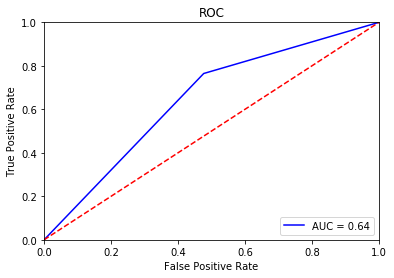

In [5]:
# Create a neural network with keras API from TensorFlow
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu',input_dim=58,kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(8, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001)))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=100,batch_size=32)

pred = model.predict(X_test)
pred =[float(x[0]) for x  in pred]

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
tp = 0
tn = 0
fp = 0
fn = 0

# calculate the performance and draw ROC curve
calculate(tp,fn,tn,fp,pred)

plot(Y_test,pred)

accuracy: 0.524
precision: 0.5406460773872914
recall: 0.5837485626676888


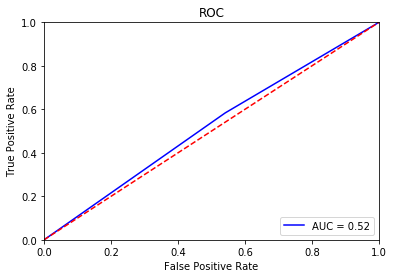

'online_news_popularity.pdf'

In [12]:
from sklearn import tree
import graphviz

# Create Decision-Tree Classifier with sklearn
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
pred1 = clf.predict(X_test)

tp = 0
tn = 0
fp = 0
fn = 0

# calculate the performance and draw ROC curve
calculate(tp,fn,tn,fp,pred1)

plot(Y_test,pred1)

# Output the graph corresponding to Decision-Tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("online_news_popularity") 

accuracy: 0.5402
precision: 0.5362377850162866
recall: 0.992090395480226


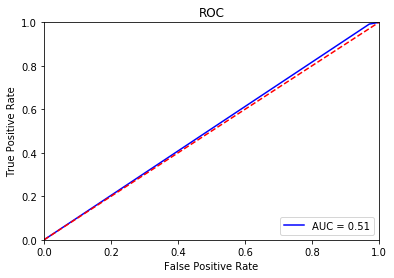

In [48]:
from sklearn import linear_model

# Create Logistic Regression Model with sklearn
clf = linear_model.LogisticRegression(random_state=0)
clf = clf.fit(X_train, Y_train)
pred2 = clf.predict(X_test)

tp = 0
tn = 0
fp = 0
fn = 0

# calculate the performance and draw ROC curve
calculate(tp,fn,tn,fp,pred2)

plot(Y_test,pred2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype <U192 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/100
30000/30000 [==============================] - 1s 43us/step - loss: 0.2565 - acc: 0.5547
Epoch 2/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2529 - acc: 0.5866
Epoch 3/100
30000/30000 [==============================] - 1s 32us/step - loss: 0.2496 - acc: 0.6147
Epoch 4/100
30000/30000 [==============================] - 1s 34us/step - loss: 0.2470 - acc: 0.6169
Epoch 5/100
30000/30000 [==============================] - 1s 35us/step - loss: 0.2452 - acc: 0.6172
Epoch 6/100
30000/30000 [==============================] - 1s 35us/step - loss: 0.2440 - acc: 0.6179
Epoch 7/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.2432 - acc: 0.6180
Epoch 8/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.2427 - acc: 0.6188
Epoch 9/100
30000/30000 [==============================] - 1s 34us/step - loss: 0.2423 - acc: 0.6182
Epoch 10/100
30000/30000 [==============================] - 1s 34us/step - loss: 0.2419 - a

30000/30000 [==============================] - 1s 31us/step - loss: 0.2372 - acc: 0.6252
Epoch 82/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2371 - acc: 0.6252
Epoch 83/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2371 - acc: 0.6234
Epoch 84/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.2370 - acc: 0.6254
Epoch 85/100
30000/30000 [==============================] - 1s 33us/step - loss: 0.2370 - acc: 0.6253
Epoch 86/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2370 - acc: 0.6243
Epoch 87/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2369 - acc: 0.6250
Epoch 88/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2369 - acc: 0.6259
Epoch 89/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2368 - acc: 0.6257
Epoch 90/100
30000/30000 [==============================] - 1s 31us/step - loss: 0.2368 - acc: 

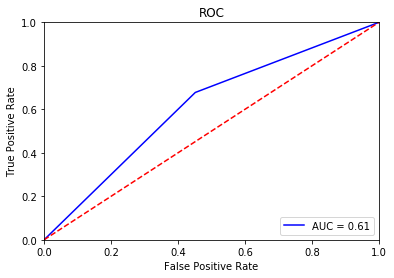

In [13]:
X_train = data[0:30000,[2, 4, 11, 14, 17, 38, 39, 40, 41, 43, 49, 50, 53]]
X_test = data[30001:35001,[2, 4, 11, 14, 17, 38, 39, 40, 41, 43, 49, 50, 53]]
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


model = keras.Sequential()

model.add(keras.layers.Dense(64, activation='relu',input_dim=13,kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(keras.layers.Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(keras.layers.Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(keras.layers.Dense(8, activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(keras.layers.Dense(4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.0001)))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=100,batch_size=32)

pred = model.predict(X_test)
pred =[float(x[0]) for x  in pred]

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
tp = 0
tn = 0
fp = 0
fn = 0

# calculate the performance and draw ROC curve
calculate(tp,fn,tn,fp,pred)

plot(Y_test,pred)


accuracy: 0.565
precision: 0.615859938208033
recall: 0.45561904761904765


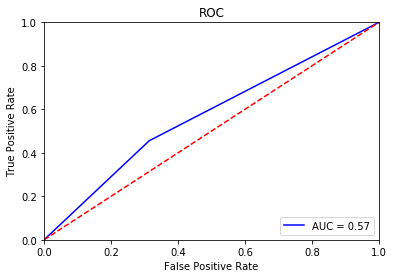

In [7]:
# Create Decision-Tree Classifier with sklearn
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
pred1 = clf.predict(X_test)

tp = 0
tn = 0
fp = 0
fn = 0

# calculate the performance and draw ROC curve
calculate(tp,fn,tn,fp,pred1)

plot(Y_test,pred1)

accuracy: 0.6228
precision: 0.6104598737601443
recall: 0.7748950782144219


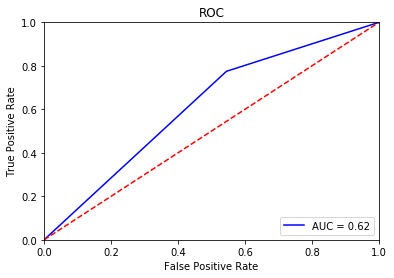

In [97]:
# Create Logistic Regression Model with sklearn
clf = linear_model.LogisticRegression(random_state=0)
clf = clf.fit(X_train, Y_train)
pred2 = clf.predict(X_test)

tp = 0
tn = 0
fp = 0
fn = 0

# calculate the performance and draw ROC curve
calculate(tp,fn,tn,fp,pred2)

plot(Y_test,pred2)